In [1]:
# 导入相应的运算库
import numpy as np
from math import pi
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer

In [5]:
# 定义相应的量子寄存器，并添加至电路当中去
# 定义变量n,即完成n量子比特的移位操作
n = 5
# q0寄存器表示地址寄存器
q0 = QuantumRegister(n,'q0')
c0 = ClassicalRegister(n,'c0')
# q1寄存器表示辅助寄存器
q1 = QuantumRegister(n-2,'q1')
# 定义一个量子电路对象
Circuit = QuantumCircuit()
# 往寄存器中添加4个量子寄存器
Circuit.add_register(q0,c0)
Circuit.add_register(q1)

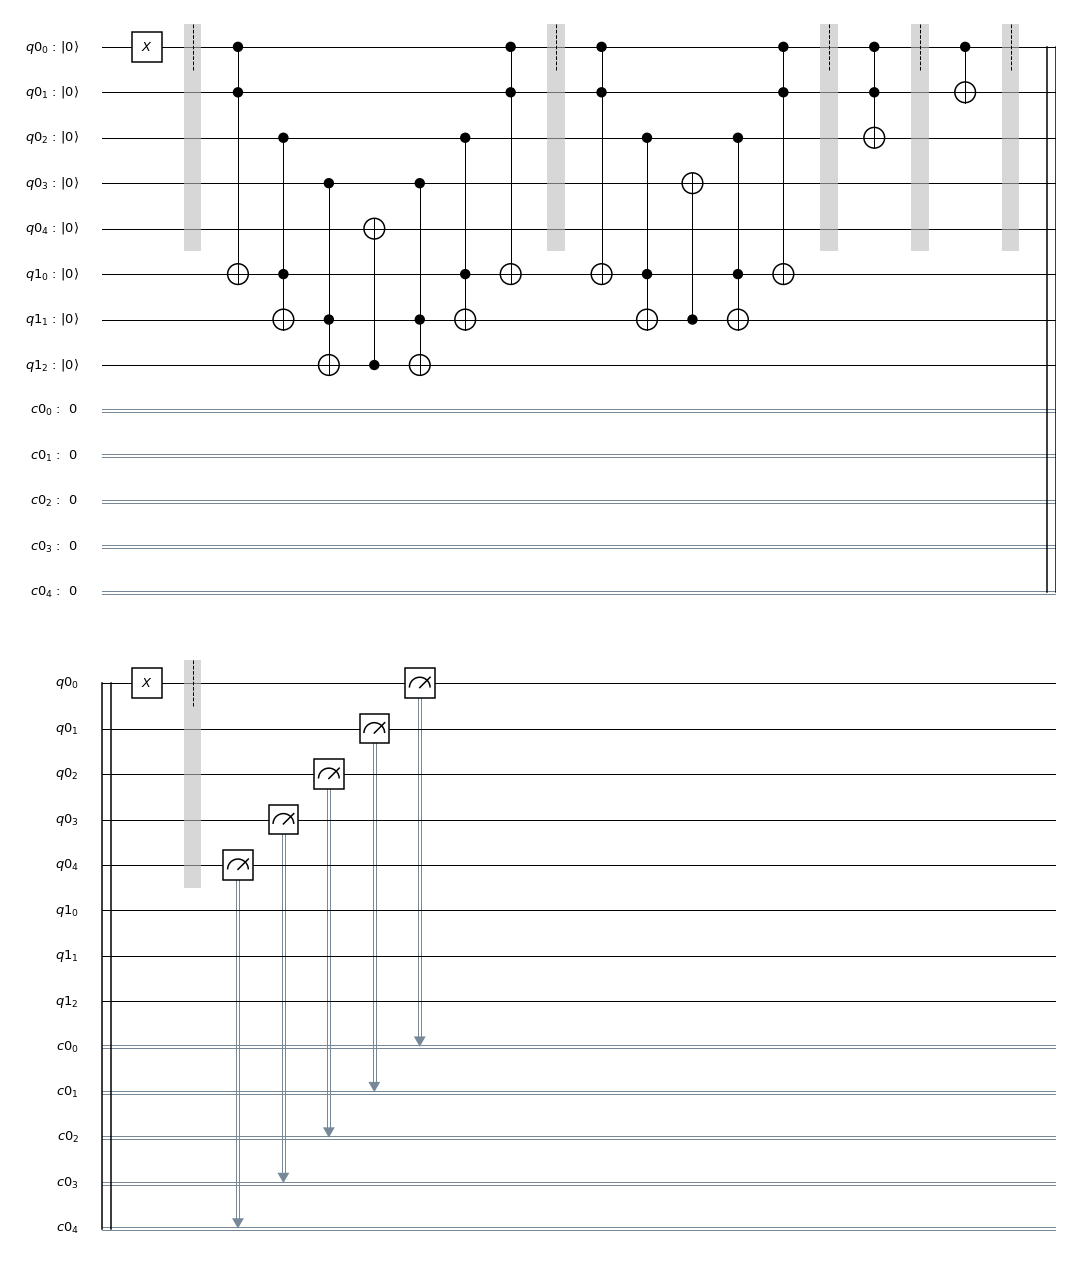

In [3]:
# 此模块为量子循环加一操作，添加量子门操作，注意这里的命名方式为最低有效位
# 初始化输入量子态
Circuit.x(q0[0])
# 用多受控非门分解策略，执行4个控制位的受控非门分解
Circuit.barrier()
Circuit.ccx(q0[0],q0[1],q1[0])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.ccx(q0[3],q1[1],q1[2])
Circuit.cx(q1[2],q0[4])
Circuit.ccx(q0[3],q1[1],q1[2])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.ccx(q0[0],q0[1],q1[0])
# 用多受控非门分解策略，执行3个控制位的受控非门分解
Circuit.barrier()
Circuit.ccx(q0[0],q0[1],q1[0])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.cx(q1[1],q0[3])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.ccx(q0[0],q0[1],q1[0])
# 执行2个控制位的受控非门操作
Circuit.barrier()
Circuit.ccx(q0[0],q0[1],q0[2])
# 执行1个控制位的受控非门操作
Circuit.barrier()
Circuit.cx(q0[0],q0[1])
# 执行非门操作
Circuit.barrier()
Circuit.x(q0[0])
# 引入测量操作
Circuit.barrier()
Circuit.measure(q0,c0)
# 绘制整个量子电路图
Circuit.draw(output='mpl')

In [4]:
# 使用 Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')
# 执行量子仿真器
job_sim = execute(Circuit, backend_sim, shots=8096)
# 获得结果
result_sim = job_sim.result()
counts = result_sim.get_counts(Circuit)
# 打印结果输出
print(counts)

{'00010': 8096}


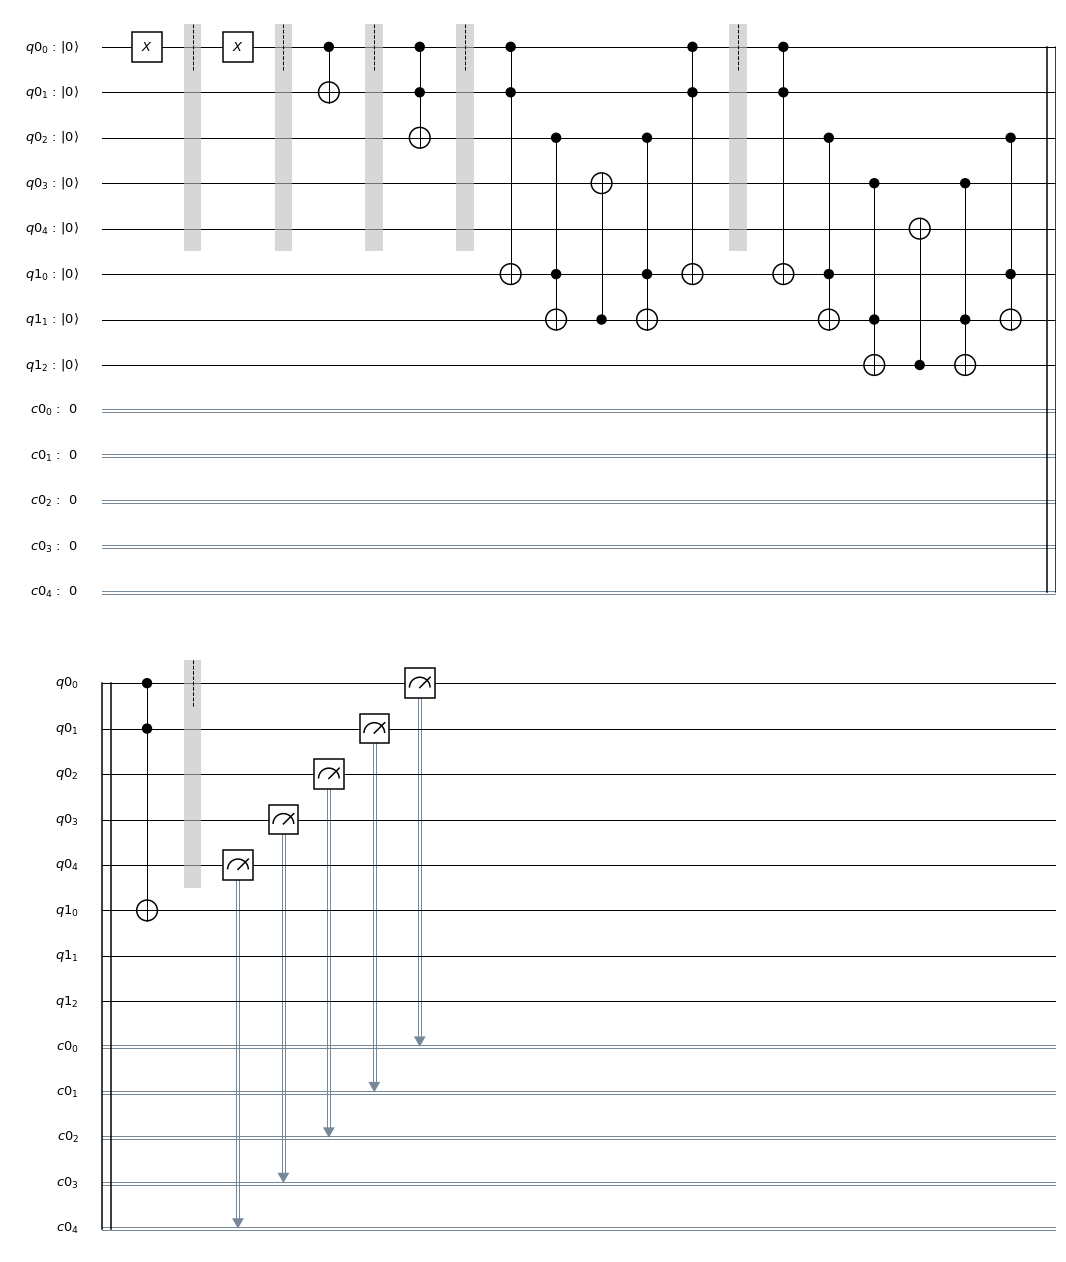

In [6]:
# 此模块为量子循环减一操作，添加量子门操作，注意这里的命名方式为最低有效位
# 初始化输入量子态
Circuit.x(q0[0])
# 执行非门操作
Circuit.barrier()
Circuit.x(q0[0])
# 执行1个控制位的受控非门操作
Circuit.barrier()
Circuit.cx(q0[0],q0[1])
# 执行2个控制位的受控非门操作
Circuit.barrier()
Circuit.ccx(q0[0],q0[1],q0[2])
# 用多受控非门分解策略，执行3个控制位的受控非门分解
Circuit.barrier()
Circuit.ccx(q0[0],q0[1],q1[0])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.cx(q1[1],q0[3])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.ccx(q0[0],q0[1],q1[0])
# 用多受控非门分解策略，执行4个控制位的受控非门分解
Circuit.barrier()
Circuit.ccx(q0[0],q0[1],q1[0])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.ccx(q0[3],q1[1],q1[2])
Circuit.cx(q1[2],q0[4])
Circuit.ccx(q0[3],q1[1],q1[2])
Circuit.ccx(q0[2],q1[0],q1[1])
Circuit.ccx(q0[0],q0[1],q1[0])
Circuit.barrier()
Circuit.measure(q0,c0)
# 绘制整个量子电路图
Circuit.draw(output='mpl')

In [7]:
# 使用 Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')
# 执行量子仿真器
job_sim = execute(Circuit, backend_sim, shots=8096)
# 获得结果
result_sim = job_sim.result()
counts = result_sim.get_counts(Circuit)
# 打印结果输出
print(counts)

{'00000': 8096}
